# Repeated Flips

Initial setup

In [4]:
from probability_simulator import Coin, CoinExperiment
import matplotlib.pyplot as plt
import numpy as np

## Problem 1 - First heads

You flip a coin repeatedly, what is the expected number of flips before the first head appears?

### Setup 


Let $X$ be our random variable of interest -  the number of flips before the first head appears
- $X$ could be one of the following outcomes: $1,2,3,4,...$
- Let $P(X = i) \equiv p_{i}$:
    - $p_1 = \frac{1}{2}$ because the first flip could be $H$
    - $p_2 = \frac{1}{4}$ because there are $2^2 = 4$ sequences of length $2$, and only $TH$ is valid
    - $p_n = \frac{1}{2^{n}}$ because there's only one valid $n$-flip sequence - $(n-1) \times T$ then $H$  

**Common mistakes:**  
- "$P(X = 2)$ is $1/2$ because the first flip *must be $T$*, then the next could be either $H$ or $T$"
    - This isn't a conditional probability: 
    - $P(X = 2|\text{start with a T}) = 1/2$, 
    - so $P(X = 2) = P(X = 2|\text{start with a T})P(T) = 1/4$ 
- "$P(X=2)$ is $1/\inf$ because we have infinite possible sequences of any length, and in only one of them do we have $HT$"
    - When calculating $p_i$, we count the number of 'valid' sequences of length $i$ ($1$ out of $2^{(i)}$ possibilities). We *don't* consider sequences of any other length. This is because the $X=i$ outcome completely specified *only* the first $i$ flips and doesn't care about anything afterward. Imagine a coin being flipped continuously at a rate of $1 \text{flip} / {sec}$. Then, $X$ is the number of seconds before the first head is flipped.  

We can simulate this distribution below:

In [8]:
fair_coin = Coin(bias=0.5)


def flips_until_head(coin: Coin):
    """Return the numbers of flips before a head is found."""
    count = 0
    while coin.flip() != 1:
        count += 1
    return count + 1


# set up an experiment
ce = CoinExperiment(fair_coin, ntrials=1000)
res = ce.run_trials(flips_until_head)

We can see that with 1000 flips, the distribution begins to match the expected $1/2^n$ plot

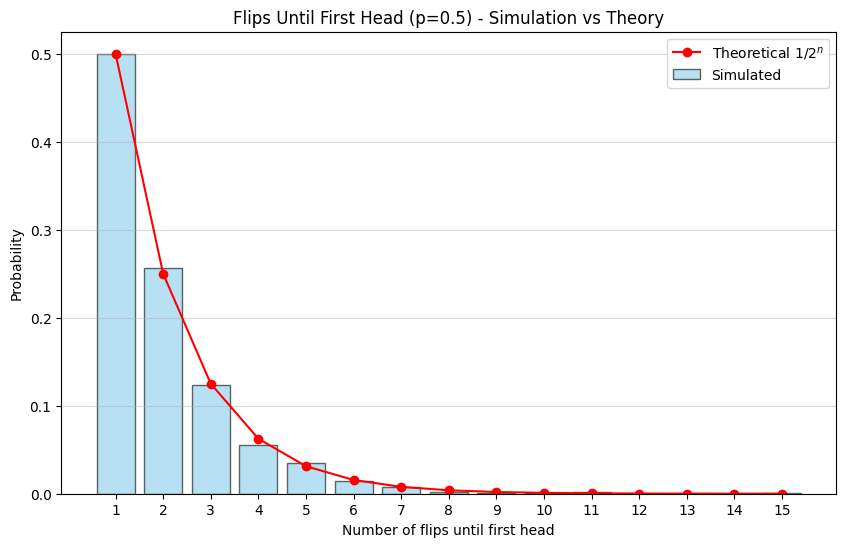

In [ ]:
max_flips = max(res)
bins = np.arange(1, max_flips + 2)  # one bin per integer
hist, edges = np.histogram(res, bins=bins, density=True)


# Actual results as a histogram
plt.figure(figsize=(10, 6))
plt.bar(edges[:-1], hist, width=0.8, alpha=0.6,
        color="skyblue", edgecolor="black", label="Simulated")
plt.xlabel("Number of flips until first head")
plt.ylabel("Probability")
plt.title("Flips Until First Head (p=0.5) - Simulation vs Theory")
plt.xticks(range(1, max_flips + 1))
plt.grid(axis="y", alpha=0.5)


# Overlay theoretical 1/2^n
n = np.arange(1, max_flips + 1)
theory = 0.5 ** n
plt.plot(n, theory, 'ro-', label=r'Theoretical $1/2^n$')

plt.legend()
plt.show()

## The expectation value 

To find $\mathbb{E}(X)$, the expectation value, we need to find $\sum_n p_n \times n$, where $n$ is the number of flips before heads is reached. 
To simulate, we don't know the true $p_n$ but can approximate it from the data 

In [11]:
ce = CoinExperiment(fair_coin, ntrials=10000)
res = ce.run_trials(flips_until_head)
simulated_expectation = np.mean(res)
print(f"Simulated expectation: {simulated_expectation}")

Simulated expectation: 1.9907
